In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(train_labels), len(test_labels)

(60000, 10000)

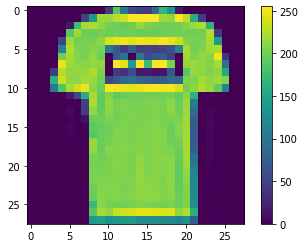

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

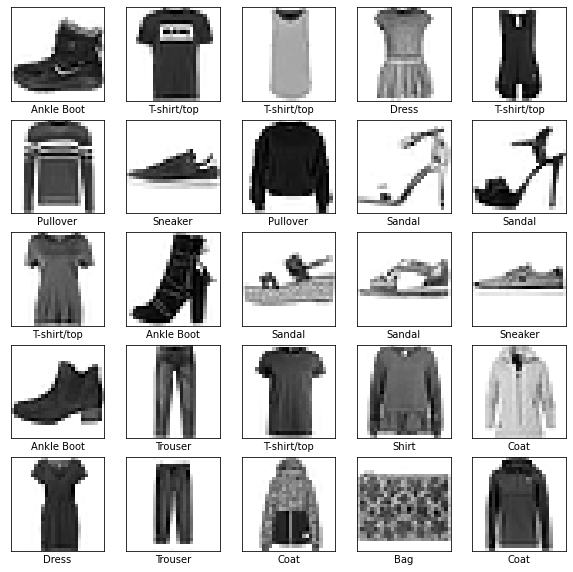

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i  + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [ ]:
inputs = keras.Input(shape=(28,28))
h = layers.Flatten()(inputs)
h = layers.Dense(128)(h)
outputs = layers.Dense(10)(h)
outputs = layers.Activation('softmax')(outputs)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5, validation_split = 0.1)

Epoch 1/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5496 - accuracy: 0.8107 - val_loss: 0.4524 - val_accuracy: 0.8400
Epoch 2/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4616 - accuracy: 0.8391 - val_loss: 0.4558 - val_accuracy: 0.8393
Epoch 3/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4393 - accuracy: 0.8474 - val_loss: 0.4278 - val_accuracy: 0.8488
Epoch 4/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4320 - accuracy: 0.8507 - val_loss: 0.4277 - val_accuracy: 0.8460
Epoch 5/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4259 - accuracy: 0.8510 - val_loss: 0.4415 - val_accuracy: 0.8448


In [ ]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(accuracy)

313/313 - 0s - loss: 0.4766 - accuracy: 0.8380
0.8379999995231628


In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([4.7140392e-07, 1.3433492e-08, 2.1983294e-06, 2.3453556e-06,
       1.8064212e-06, 1.4706641e-01, 8.5645579e-06, 8.9075588e-02,
       5.0414266e-04, 7.6333845e-01], dtype=float32)

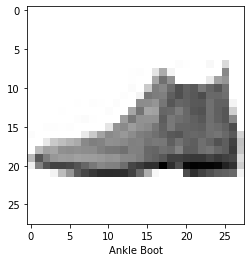

In [ ]:
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.xlabel(class_names[np.argmax(predictions[0])])
plt.show()

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
model.fit(train_images, train_labels, epochs=100, validation_split = 0.1, callbacks=[early_stop])

Epoch 1/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4191 - accuracy: 0.8532 - val_loss: 0.4213 - val_accuracy: 0.8543
Epoch 2/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4166 - accuracy: 0.8538 - val_loss: 0.4397 - val_accuracy: 0.8468
Epoch 3/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4109 - accuracy: 0.8568 - val_loss: 0.4551 - val_accuracy: 0.8375
Epoch 4/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4072 - accuracy: 0.8562 - val_loss: 0.4642 - val_accuracy: 0.8370
Epoch 5/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4051 - accuracy: 0.8572 - val_loss: 0.4253 - val_accuracy: 0.8543
Epoch 6/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4023 - accuracy: 0.8574 - val_loss: 0.4235 - val_accuracy: 0.8517
Epoch 7/100
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3999 - accuracy: 0.8596 - val_loss: 0.4294 - val_ac

**# AutoEncoder**

In [4]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model

In [5]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [6]:
input_img = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_img)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)

In [10]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [11]:
x_train = train_images.reshape((train_images.shape[0],-1))
x_train.shape

(60000, 784)

In [12]:
x_test = test_images.reshape((test_images.shape[0],-1))
x_test.shape

(10000, 784)

In [19]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                validation_split=0.1)

Epoch 1/50
211/211 [==============================] - 2s 11ms/step - loss: 235716488534721916834276179968.0000 - val_loss: 241002214449531979243385257984.0000
Epoch 2/50
211/211 [==============================] - ETA: 0s - loss: 235845484697567984062933499904.0000

KeyboardInterrupt: ignored

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

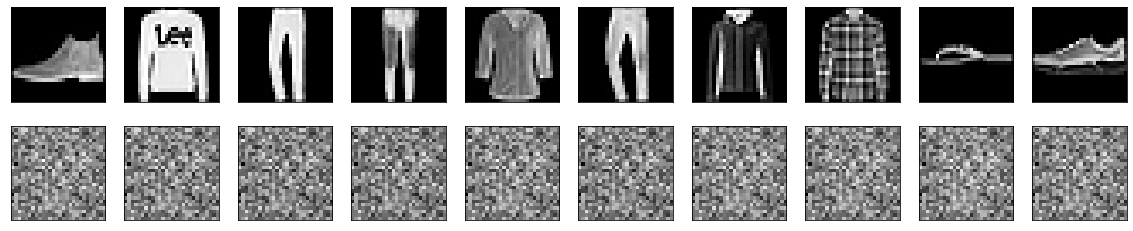

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

In [ ]:
encoded_imgs.shape

(10000, 2)

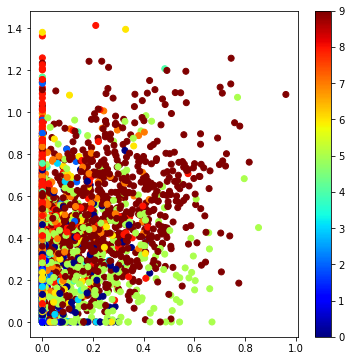

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=test_labels, cmap=plt.cm.jet)
plt.colorbar()
plt.show()